# ECG Repository Tutorial

This notebook demonstrates a full working pipeline using the PyTorch-based modules from the repository. We simulate an ECG signal, preprocess it using the `ECGPreprocessor`, extract features, train a classifier, and plot the results.

In [2]:
import sys
import os

# Get the repository root folder (assuming the notebook is in /your-project-root/notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import torch
import logging

# Import configuration and preprocessor (PyTorch-based versions)
from ecg_processor.config import ECGConfig
from ecg_processor.ecg_preprocessor import ECGPreprocessor

logging.basicConfig(level=logging.DEBUG)
print('Libraries imported successfully.')

Libraries imported successfully.


## Simulate an ECG Signal

We use NeuroKit2 to simulate a realistic 10-second ECG signal.

In [3]:
fs = ECGConfig.DEFAULT_SAMPLING_RATE  # e.g., 500 Hz
duration = 10  # seconds
ecg_simulated = nk.ecg_simulate(duration=duration, sampling_rate=fs, noise=0.01)
print('Simulated ECG shape:', ecg_simulated.shape)

Simulated ECG shape: (5000,)


## Preprocess the ECG Signal

Here we instantiate the `ECGPreprocessor` and process the simulated ECG signal. The preprocessing includes filtering, optional denoising, beat segmentation, feature extraction, and HRV metrics calculation.

In [4]:
preprocessor = ECGPreprocessor()
result = preprocessor.process_signal(ecg_simulated, denoise_method='none')

print('Processed signal shape:', result['processed_signal'].shape)
print('Number of detected peaks:', len(result['peaks']))
print('HRV Metrics:', result['hrv_metrics'])

ERROR:ecg_processor.quality:Error calculating baseline metrics: detrend() got an unexpected keyword argument 'deg'


Processed signal shape: (5000,)
Number of detected peaks: 11
HRV Metrics: {'mean_hr': np.float64(70.07708479327259), 'sdnn': 14.312387796746021, 'rmssd': 18.961950204437187, 'pnn50': 0.0, 'mean_rr': 856.2, 'sdsd': 20.09975124224178, 'vlf_power': 0.0, 'lf_power': 0.0, 'hf_power': 97.36527377055967, 'lf_hf_ratio': 0.0, 'total_power': 97.36527377055967, 'lf_nu': 0.0, 'hf_nu': 100.0, 'peak_vlf': 0.0, 'peak_lf': 0.12903225806451613, 'peak_hf': 0.25806451612903225}


## Plot Original vs. Processed ECG Signals

We now plot the original (simulated) and processed ECG signals.

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


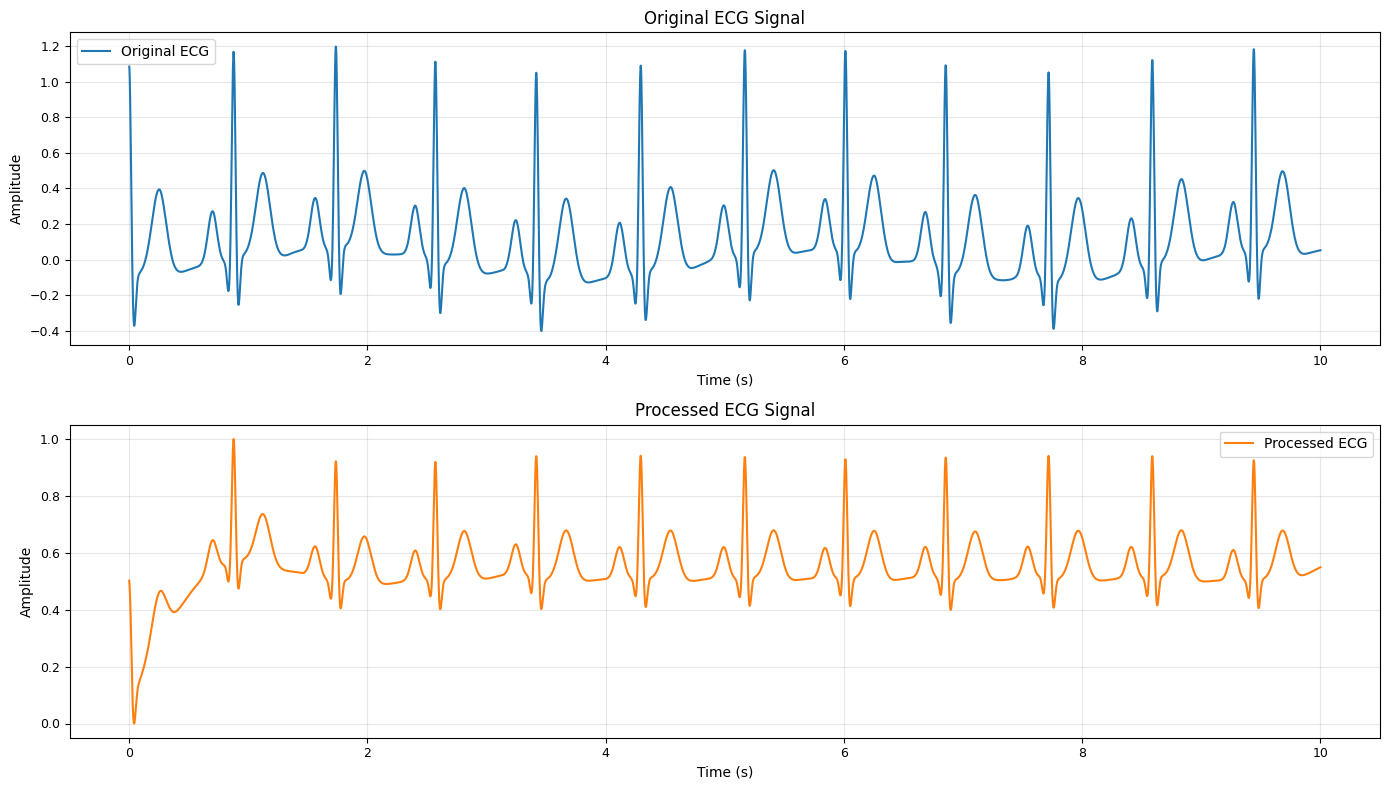

In [5]:
t = np.linspace(0, duration, len(ecg_simulated))
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(t, result['original_signal'], label='Original ECG', color='C0')
plt.title('Original ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, result['processed_signal'], label='Processed ECG', color='C1')
plt.title('Processed ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Beat Classification and HRV Metrics

If beats are detected, we can train a classifier and classify the beats. In this example, we assign random binary labels for demonstration.

In [6]:
if len(result['beats']) > 0:
    labels = np.random.randint(0, 2, size=len(result['beats']))
    training_success = preprocessor.train_classifier(result['beats'], labels)
    if training_success:
        classification_result = preprocessor.classify_beats(result['beats'])
        print('Beat classifications:', classification_result['classifications'])
        print('Class probabilities:', classification_result['probabilities'])
    else:
        print('Classifier training failed.')
else:
    print('No beats detected for classification.')

Beat classifications: [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]
Class probabilities: [[0.72, 0.28], [0.77, 0.23], [0.92, 0.08], [0.12, 0.88], [0.03, 0.97], [0.19, 0.81], [0.88, 0.12], [0.2, 0.8], [0.11, 0.89], [0.67, 0.33], [0.91, 0.09]]


## Summary

In this tutorial, we simulated an ECG signal, processed it using the PyTorch-based modules, extracted features, calculated HRV metrics, trained a (demo) beat classifier, and plotted the results.